## Amostragem Simples

In [11]:
import pandas as pd
import numpy as np
from math import ceil

# Importação de dados
base = pd.read_csv("data/iris.csv")
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
base.shape

(150, 5)

In [13]:
# Criação de um seed aleatória, pra ele se manter em uma execução futura
np.random.seed(8008135)

# Amostra de 150 elementos
amostra = np.random.choice(a=[0,1], size=150, replace=True, p=[0.7,0.3])

# Tamanho da amostra
print("Tamanho amostra:",len(amostra))

# Tamanho das amostras
print("0's da amostra: ", len(amostra[amostra == 0]))
print("1's da amostra: ", len(amostra[amostra == 1]))


Tamanho amostra: 150
0's da amostra:  101
1's da amostra:  49


In [14]:
# Verifica todos os indices do "amostra" == 0 e filtra uma amostragem em "base"
base_final = base.loc[amostra == 0]
base_final.shape

(101, 5)

In [15]:
base_final

,sepal length,sepal width,petal length,petal width,class
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Amostragem Sistemática

In [16]:
# Criação de variaveis de apoio
populacao = 150
amostra = 15
k = ceil(populacao / amostra)
k

10

In [21]:
# Definição do valor randomico para iniciar a amostra, indo de 1 até k + 1
r = np.random.randint(low=1, high=k, size=1)[0]
r[0]

4

In [22]:
# Laço para somar os proximos valores, baseado no valor r
acumulador = r[0]
sorteados = []
for i in range(amostra):
    sorteados.append(acumulador)
    acumulador += k

sorteados

[4, 14, 24, 34, 44, 54, 64, 74, 84, 94, 104, 114, 124, 134, 144]

In [23]:
base = pd.read_csv("data/iris.csv")
base_final = base.loc[sorteados]
base_final

,sepal length,sepal width,petal length,petal width,class
4,5.0,3.6,1.4,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
54,6.5,2.8,4.6,1.5,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor


## Amostragem Estratificada

In [26]:
from sklearn.model_selection import train_test_split

iris = pd.read_csv("data/iris.csv")
iris["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [27]:
# iris.iloc[:, 0:4]: buscamos somente os atributos previsores, ou seja, os dados sobre pétala e sétala da planta
# iris.iloc[:, 4]: buscamos somente a classe, que é a espécie da planta (setosa, virginica ou versicolor)
# test_size: selecionamos 50% da base de dados, que serão copiados para as variáveis X e Y. Essa função retorna 4 valores,
# porém, vamos usar somente os 50% da base de dados e por isso colocamos "_" para os outros valores
# stratify: para retornar a amostra baseada na classe
X, _, Y, _ = train_test_split(iris.iloc[:,0:4], iris.iloc[:,4], 
                            test_size=0.5, stratify=iris.iloc[:, 4]) 
Y.value_counts()

Iris-virginica     25
Iris-setosa        25
Iris-versicolor    25
Name: class, dtype: int64

In [28]:
infert = pd.read_csv("data/infert.csv")
infert.head()

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32


In [29]:
infert["education"].value_counts()

6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: education, dtype: int64

In [31]:
X, _, Y, _ = train_test_split(infert.iloc[:,2:9], infert.iloc[:,1], 
                            test_size=0.6, stratify=infert.iloc[:, 1]) 
Y.value_counts()

6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: education, dtype: int64

127    12+ yrs
1       0-5yrs
237    12+ yrs
9      6-11yrs
207    6-11yrs
        ...   
157    12+ yrs
87     6-11yrs
50     12+ yrs
196    6-11yrs
148    12+ yrs
Name: education, Length: 99, dtype: object

## Medidas de Centralidade e Variabilidade

In [33]:
from scipy import stats

jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]
# Média 
np.mean(jogadores)

181111.11111111112

In [36]:
# Mediana
np.median(jogadores)

40000.0

In [38]:
# Quartis
quartis = np.quantile(jogadores, [0, 0.25, .5, .75, 1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [39]:
np.std(jogadores, ddof=1)

255307.87514511007

In [35]:
# Visualização das estatisticas
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

## Distribuição normal

In [41]:
from scipy.stats import norm

# Conjunto de objetos em uma cesta, a média é 8 e o desvio padrão é 2
# Qual a probabilidade de tirar um objeto que é menor que 6 quilos?
norm.cdf(6,8,2)

0.15865525393145707

In [43]:
# E qual é de que o peso de seja maior que 6?
print(norm.sf(6,8,2))
1 - norm.cdf(6,8,2)

0.8413447460685429


0.8413447460685429

In [44]:
# Qual a probabilidade de ser menor que 6 ou maior que 10?
norm.cdf(6,8,2) + norm.sf(10, 8, 2)

0.31731050786291415

In [45]:
# Qual a probabilidade de ser menor que 10 e maior que 8 quilos?
norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2)

0.3413447460685429

## Teste de Normalidade

In [3]:
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

# Criação de dados com distribuição normal
dados = norm.rvs(size=1000)
dados


array([ 1.42988859e+00,  6.59504485e-01,  3.35112030e-01,  6.72541683e-01,
       -1.07258025e+00,  2.18121639e+00,  1.28876979e+00,  7.11039607e-01,
       -9.76255142e-01, -1.02228323e-01,  6.18194118e-01,  1.50722436e+00,
        6.31300916e-01,  6.30557718e-01, -3.92678633e-01, -1.43274603e+00,
       -4.38555420e-01,  4.21289146e-01, -9.72843111e-01, -3.26057307e-01,
        1.19979690e+00,  1.01446763e+00, -9.21388706e-01,  2.17515341e+00,
       -1.38019395e-01, -5.94110184e-01, -6.21414903e-01, -5.60118792e-01,
        1.05801053e+00, -1.51508687e+00,  1.30529128e+00, -9.28726106e-02,
       -1.15313919e+00, -4.09150129e-01,  1.13345362e+00, -4.24987865e-01,
        1.25578874e+00, -3.43305698e-01,  5.34626233e-01,  3.32182442e-01,
       -1.00765453e+00, -3.75493428e-01,  2.04634861e+00,  1.05159593e+00,
       -2.39494323e+00,  1.18921812e+00,  3.80764620e-01, -2.31212055e-02,
        4.09541380e-01, -1.56171539e+00, -1.64075530e-01,  1.91547292e+00,
       -4.75542462e-01,  

Text(0.5, 1.0, 'Dados')

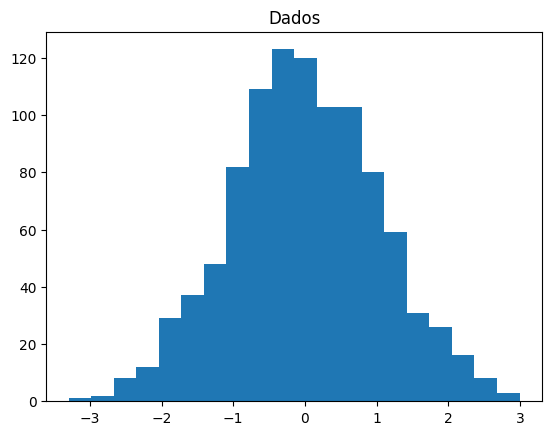

In [6]:
# Histograma
plt.hist(dados, bins=20)
plt.title("Dados")

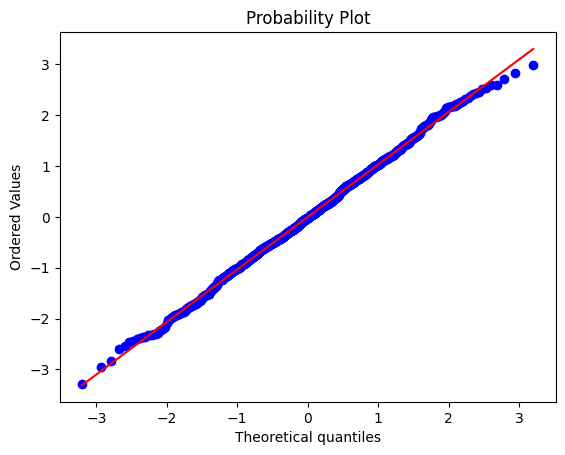

In [7]:
# Geração de gráficos para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(dados, fit=True, plot=ax)
plt.show()

In [9]:
# Execução do teste de Shapiro
# Se acima de 0.05, tende a ser uma distruibuição normal
stats.shapiro(dados)

ShapiroResult(statistic=0.9986142516136169, pvalue=0.6306357979774475)

## Dados Não-Normais

Text(0.5, 1.0, 'Dados')

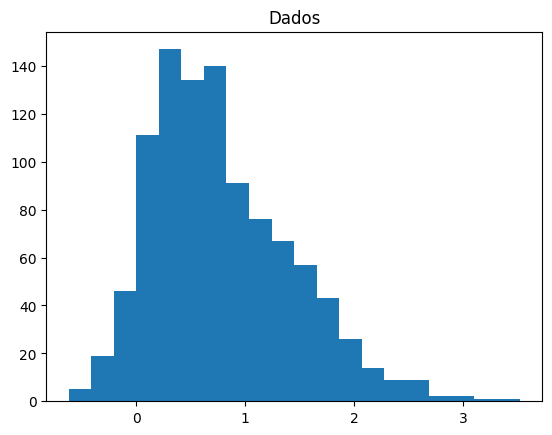

In [12]:
dados2 = skewnorm.rvs(4, size=1000)

plt.hist(dados2, bins=20)
plt.title("Dados")

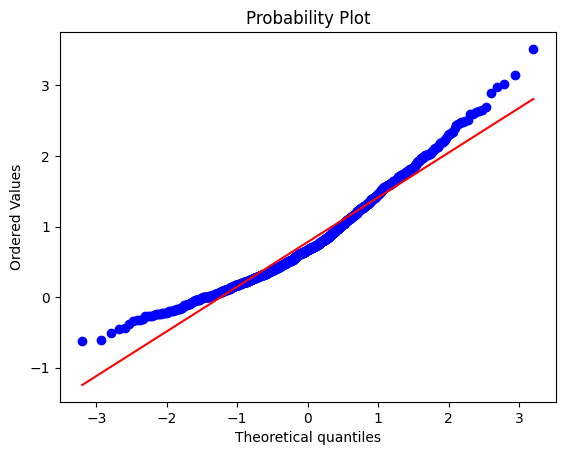

In [13]:
fig, ax = plt.subplots()
stats.probplot(dados2, fit=True, plot=ax)
plt.show()

In [14]:
# Infinitamente menor que 0.05
stats.shapiro(dados2)


ShapiroResult(statistic=0.9617775678634644, pvalue=1.6218615238319735e-15)